In [2]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
iris=pd.read_csv(r"D:\Downloads\train.csv")
print(iris)

C:\Users\intel\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


     Pclass                                               Name     Sex    Age  \
0         2      Weisz, Mrs. Leopold (Mathilde Francoise Pede)  female  29.00   
1         3                  Williams, Mr. Howard Hugh "Harry"    male    NaN   
2         2     Morley, Mr. Henry Samuel ("Mr Henry Marshall")    male  39.00   
3         3        Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.00   
4         3                             Sutehall, Mr. Henry Jr    male  25.00   
5         3                         Lemberopolous, Mr. Peter L    male  34.50   
6         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00   
7         3                                 Jonkoff, Mr. Lalio    male  23.00   
8         2                       Williams, Mr. Charles Eugene    male    NaN   
9         3                           Rouse, Mr. Richard Henry    male  50.00   
10        3                    Stanley, Miss. Amy Zillah Elsie  female  23.00   
11        3                 

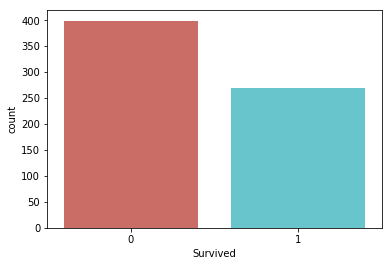

In [3]:
sb.countplot(x='Survived',data=iris, palette='hls') #Checking that our target variable is giving binary outputs.(Refer datamania.com/blogs)

In [5]:
iris.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

In [6]:
iris=iris.drop(['Name','Ticket','Cabin'],1)
iris.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,female,29.0,1,0,26.000,S,1
1,3,male,NaN,0,0,8.050,S,0
2,2,male,39.0,0,0,26.000,S,0
3,3,female,29.0,0,4,21.075,S,0
4,3,male,25.0,0,0,7.050,S,0


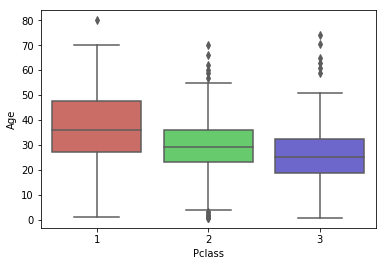

In [7]:
sb.boxplot(x='Pclass', y='Age', data=iris, palette='hls')# How passenger class is related to age.
# Since age column has missing values,therefore we compare age values with Pclass.

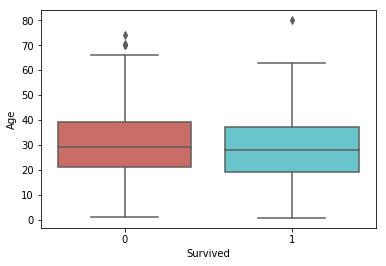

In [8]:
sb.boxplot(x='Survived', y='Age', data=iris, palette='hls')# No conclusion can be drawn from this age and survived comparison.

In [9]:
#Created a function to fill null values of age. 
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [10]:
iris['Age'] = iris[['Age', 'Pclass']].apply(age_approx, axis=1)
iris.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    1
Survived    0
dtype: int64

(667, 8)

In [34]:
#Dropping further NA values.
iris.Embarked.fillna("S",inplace=True)
iris.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [35]:
#Converting categorical values to numericals.
gender = pd.get_dummies(iris['Sex'],drop_first=True)
gender.head()

,male
0,0
1,1
2,1
3,0
4,1


In [36]:
embark_location = pd.get_dummies(iris['Embarked'],drop_first=True)
embark_location.head()

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [37]:
iris.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,female,29.0,1,0,26.000,S,1
1,3,male,24.0,0,0,8.050,S,0
2,2,male,39.0,0,0,26.000,S,0
3,3,female,29.0,0,4,21.075,S,0
4,3,male,25.0,0,0,7.050,S,0


In [38]:
titanic_dmy = pd.concat([iris,gender,embark_location],axis=1)
titanic_dmy.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,male,Q,S
0,2,female,29.0,1,0,26.000,S,1,0,0,1
1,3,male,24.0,0,0,8.050,S,0,1,0,1
2,2,male,39.0,0,0,26.000,S,0,1,0,1
3,3,female,29.0,0,4,21.075,S,0,0,0,1
4,3,male,25.0,0,0,7.050,S,0,1,0,1


In [39]:
titanic_dmy.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,male,Q,S
0,2,female,29.0,1,0,26.000,S,1,0,0,1
1,3,male,24.0,0,0,8.050,S,0,1,0,1
2,2,male,39.0,0,0,26.000,S,0,1,0,1
3,3,female,29.0,0,4,21.075,S,0,0,0,1
4,3,male,25.0,0,0,7.050,S,0,1,0,1


In [40]:
titanic_dmy.drop(['Fare', 'Pclass'],axis=1,inplace=True)
titanic_dmy.head()

,Sex,Age,SibSp,Parch,Embarked,Survived,male,Q,S
0,female,29.0,1,0,S,1,0,0,1
1,male,24.0,0,0,S,0,1,0,1
2,male,39.0,0,0,S,0,1,0,1
3,female,29.0,0,4,S,0,0,0,1
4,male,25.0,0,0,S,0,1,0,1


In [41]:
titanic_dmy.drop(['Sex', 'Embarked'],axis=1,inplace=True)
titanic_dmy.head()

,Age,SibSp,Parch,Survived,male,Q,S
0,29.0,1,0,1,0,0,1
1,24.0,0,0,0,1,0,1
2,39.0,0,0,0,1,0,1
3,29.0,0,4,0,0,0,1
4,25.0,0,0,0,1,0,1


In [42]:
x=titanic_dmy.ix[:,(0,1,2,4,5,6)].values
y=titanic_dmy.ix[:,3].values

C:\Users\intel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\intel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    1
dtype: int64

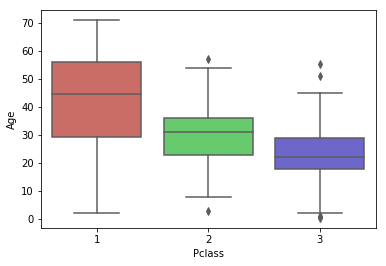

In [43]:
#Clean the testing data also.
test=pd.read_csv(r"D:\Downloads\test.csv")
test=test.drop(['Name','Ticket','Cabin'],1)
test.head()
sb.boxplot(x='Pclass', y='Age', data=test, palette='hls')# How passenger class is related to age.
# Since age column has missing values,therefore we compare age values with Pclass.
test['Age'] = test[['Age', 'Pclass']].apply(age_approx, axis=1)
test.isnull().sum()


In [44]:
test.Embarked.fillna("S",inplace=True)

In [45]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [46]:
#Converting categorical values to numericals.
gender1 = pd.get_dummies(test['Sex'],drop_first=True)
gender1.head()
embark_location1 = pd.get_dummies(test['Embarked'],drop_first=True)
embark_location1.head()

,Q,S
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [47]:
testdata = pd.concat([test,gender1,embark_location1],axis=1)
testdata.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,2,male,8.0,1,1,36.7500,S,1,0,1
1,1,female,49.0,0,0,25.9292,S,0,0,1
2,3,male,24.0,0,0,7.7375,Q,1,1,0
3,2,female,24.0,2,1,27.0000,S,0,0,1
4,1,male,36.0,0,0,26.2875,S,1,0,1


In [48]:
testdata.drop(['Sex', 'Embarked'],axis=1,inplace=True)
testdata.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,2,8.0,1,1,36.7500,1,0,1
1,1,49.0,0,0,25.9292,0,0,1
2,3,24.0,0,0,7.7375,1,1,0
3,2,24.0,2,1,27.0000,0,0,1
4,1,36.0,0,0,26.2875,1,0,1


In [49]:
testdata.drop(['Fare', 'Pclass'],axis=1,inplace=True)
testdata.head()

,Age,SibSp,Parch,male,Q,S
0,8.0,1,1,1,0,1
1,49.0,0,0,0,0,1
2,24.0,0,0,1,1,0
3,24.0,2,1,0,0,1
4,36.0,0,0,1,0,1


In [50]:
testdata.isnull().sum()

Age      0
SibSp    0
Parch    0
male     0
Q        0
S        0
dtype: int64

In [51]:
testdata.head()

,Age,SibSp,Parch,male,Q,S
0,8.0,1,1,1,0,1
1,49.0,0,0,0,0,1
2,24.0,0,0,1,1,0
3,24.0,2,1,0,0,1
4,36.0,0,0,1,0,1


In [52]:
#NOTE:-
#Always,training data ka size and test data ka size same hona chahiye warna nahi chalega.
#Soo isliye test data mein koi "ROW" drop nahi kar skte coz size change ho jayega..but columns drop ho sakte.
#LogisticRegression() ke parameters change krke dekho score change hota hai,,,like change c ki value and solver etc.
LogReg = LogisticRegression(max_iter=100,solver='saga')
print(LogReg)
LogReg.fit(x,y)
LogReg.score(x,y)# This calculates mean accuracy,it calculates the predictions from x and then compares these pred. with y.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)


C:\Users\intel\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7841079460269865

In [53]:
print(x.shape)
print(testdata.shape)

(667, 6)
(223, 6)


In [32]:
y_pred = LogReg.predict(testdata)
LogReg.score(testdata,y_pred)#Here I am comparing the testdata predictions which are y_pred(already)with y_pred itself.So,o/p:1. 

1.0

In [33]:
np.savetxt("Ouput3.csv",y_pred,delimiter=",")